<a href="https://colab.research.google.com/github/nehayan987-byte/DE-project/blob/main/Copy_of_ML_hotel_booking_Prediction_checkpoint_intranship_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
def data_clean(df):
     df.fillna(0,inplace=True)
     print(df.isna().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_of_cols = ['adults','children','babies']

for i in list_of_cols:
  print (f"{i} has unique valiues as {df[i].unique()}")

adults has unique valiues as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique valiues as [ 0.  1.  2. 10.  3.]
babies has unique valiues as [ 0  1  2 10  9]


In [ ]:
filtered_data = (df[ 'children'] == 0) & (df[ 'adults'] == 0) & (df['babies'] == 0) #noone came dirty do
final_data = df[~filtered_data] #filter it out

In [ ]:
final_data.shape

(119210, 32)

#where do the guests come from?

In [ ]:
country_wise_data = final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country','no_of_guest']
print(country_wise_data)

    country  no_of_guest
0       PRT        20977
1       GBR         9668
2       FRA         8468
3       ESP         6383
4       DEU         6067
..      ...          ...
161     BHR            1
162     DJI            1
163     MLI            1
164     NPL            1
165     FRO            1

[166 rows x 2 columns]


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['country'],
color = country_wise_data["no_of_guest"],
hover_name = country_wise_data[ 'country'],
title = "Home country of guests"
)
map_guests.show()
map_guests = px.choropleth(country_wise_data, locations = country_wise_data[ 'country'],
color = country_wise_data["no_of_guest"],
hover_name = country_wise_data['country'],
title = "Home country of guests"
)
map_guests.show()

#how much do guest pay for a room per night


In [ ]:
final_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['adr']

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [ ]:
data = final_data[final_data['is_canceled'] == 0]

(0.0, 600.0)

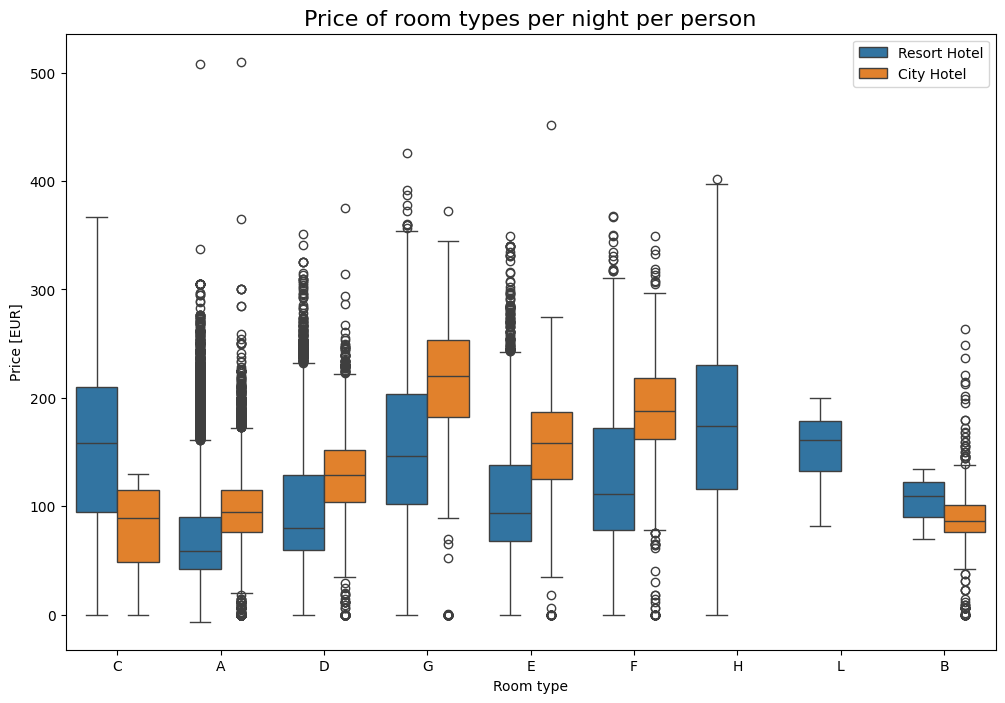

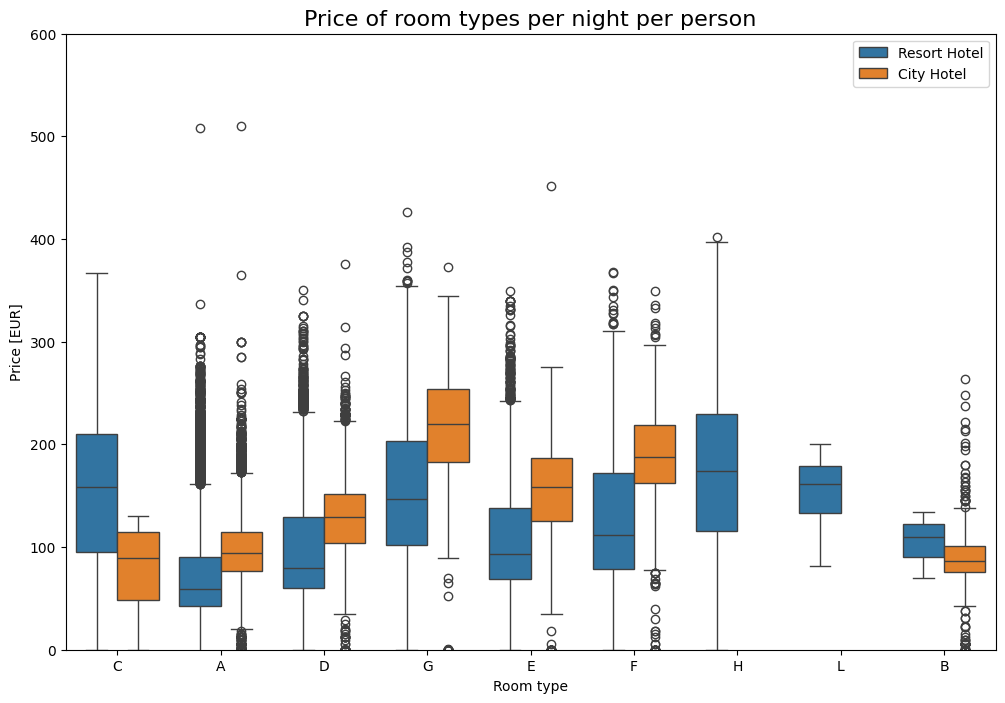

In [ ]:
#boxplot
plt.figure(figsize = (12,8)) #default
sns.boxplot(x = "reserved_room_type",
y = "adr",
hue = "hotel", data = data)
plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
#boxplot
plt.figure(figsize = (12,8)) #default
sns.boxplot(x = "reserved_room_type",
y = "adr",
hue = "hotel", data = data)
plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.ylabel("Price [EUR]")
plt. legend(loc = "upper right")
plt.ylim(0,600)

In [ ]:
final_data["hotel"] .unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]
data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [ ]:
#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
#how many people came to city hotel per month
city_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
final = resort_hotel.merge(city_hotel, on="arrival_date_month")
final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

In [ ]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816             75.867816
1      August              181.205892            181.205892
2    December               68.410104             68.410104
3    February               54.147478             54.147478
4     January               48.761125             48.761125
5        July              150.122528            150.122528
6        June              107.974850            107.974850
7       March               57.056838             57.056838
8         May               76.657558             76.657558
9    November               48.706289             48.706289
10    October               61.775449             61.775449
11  September               96.416860             96.416860


sort the monthe

In [ ]:
from calendar import month_name
for i, name in enumerate(month_name):
    print(i, name)

0 
1 January
2 February
3 March
4 April
5 May
6 June
7 July
8 August
9 September
10 October
11 November
12 December


In [ ]:
from calendar import month_name

def sort_month(df, colname) :
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month num").reset_index().drop(['index', 'month num'], axis = 1)


In [ ]:
sort_month(final, "month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,48.761125
1,February,54.147478,54.147478
2,March,57.056838,57.056838
3,April,75.867816,75.867816
4,May,76.657558,76.657558
5,June,107.974850,107.974850
6,July,150.122528,150.122528
7,August,181.205892,181.205892
8,September,96.416860,96.416860
9,October,61.775449,61.775449


<Axes: xlabel='month'>

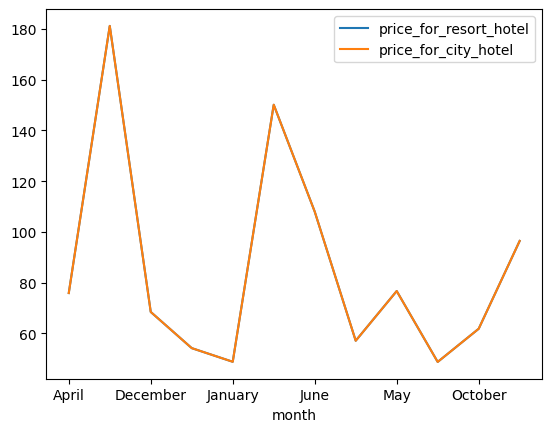

In [ ]:
final.plot(kind = "line", x = "month", y = ['price_for_resort_hotel','price_for_city_hotel'])

Which are the most busy month or in which months Guests are high?

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ['month','no of guests']
print(rush_resort)

        month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [ ]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ['month','no of guests']
print(rush_city)

        month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [ ]:
final_rush = rush_resort.merge(rush_city, on = 'month')
final_rush.columns = ['month', 'no of guests in resort hotel', 'no of guests in city hotel']
final_rush


,month,no of guests in resort hotel,no of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush = sort_month (final_rush, "month")
print(final_rush)

        month  no of guests in resort hotel  no of guests in city hotel
0     January                          1866                        2249
1    February                          2308                        3051
2       March                          2571                        4049
3       April                          2550                        4010
4         May                          2535                        4568
5        June                          2037                        4358
6        July                          3137                        4770
7      August                          3257                        5367
8   September                          2102                        4283
9     October                          2575                        4326
10   November                          1975                        2676
11   December                          2014                        2377


<Axes: xlabel='month'>

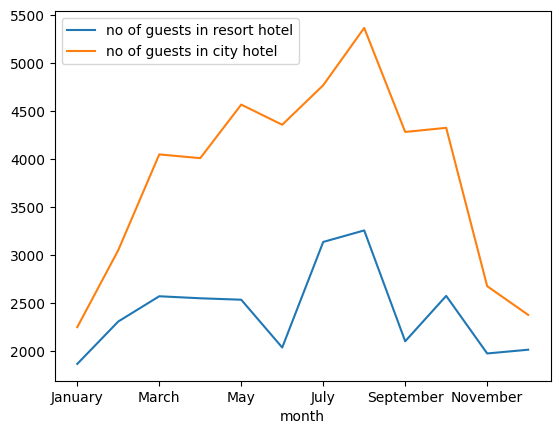

In [ ]:
#plot Line plot month va no of quest.
final_rush.plot(kind = "line", x = "month",
      y = ['no of guests in resort hotel', 'no of guests in city hotel'])


In [ ]:
#select important feature using corelation
corr = final_data.select_dtypes(include=np.number).corr()
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [ ]:
correlation = corr['is_canceled'][1:]

In [ ]:
correlation.abs().sort_values(ascending = False)

,is_canceled
lead_time,0.292876
total_of_special_requests,0.234877
required_car_parking_spaces,0.195701
booking_changes,0.144832
previous_cancellations,0.110139
is_repeated_guest,0.083745
company,0.083594
adults,0.058182
previous_bookings_not_canceled,0.057365
days_in_waiting_list,0.054301


In [ ]:
list_not  = ['days_in_waiting_list','arrival_date_year']

In [ ]:
numerical_feactures = [col for col in final_data.columns if final_data[col].dtype != 'O' and col not in list_not] #numerical one


In [ ]:
print(numerical_feactures)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
[col for col in final_data.columns if final_data[col].dtype == 'O'] #categorical one


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
categorical_not = ['country','reservation_status','booking_changes', 'assigned_room_type','days_in_waiting_list']

In [ ]:
cat_feactures = [col for col in final_data.columns if final_data[col].dtype != 'O' and col not in categorical_not]

In [ ]:
print(cat_feactures)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
print(numerical_feactures)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
data_cat = final_data[cat_feactures]

In [ ]:
print(data_cat.head())

   is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0     

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Check if 'reservation_status_date' is in the DataFrame
if 'reservation_status_date' in data_cat.columns:
    data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])
else:
    print("Column 'reservation_status_date' not found in the DataFrame.")

Column 'reservation_status_date' not found in the DataFrame.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Check if 'reservation_status_date' is in the original DataFrame (final_data)
if 'reservation_status_date' in final_data.columns:
    # If it exists, convert it to datetime in the original DataFrame
    final_data['reservation_status_date'] = pd.to_datetime(final_data['reservation_status_date'])
    # Then, create data_cat with the updated final_data


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Check if 'reservation_status_date' is in the original DataFrame (final_data)
if 'reservation_status_date' in final_data.columns:
    # If it exists, convert it to datetime in the original DataFrame
    final_data['reservation_status_date'] = pd.to_datetime(final_data['reservation_status_date'])
    # Recreate data_cat to include the updated column
    # Assuming data_cat was created from final_data previously,
    # adjust this line to reflect how data_cat was originally created

    # Replace ... with the actual column names between 'lead_time' and 'reservation_status_date'
    # Get all columns between 'lead_time' and 'reservation_status_date'
    start_index = final_data.columns.get_loc('lead_time')
    end_index = final_data.columns.get_loc('reservation_status_date')
    selected_columns = final_data.columns[start_index : end_index + 1].tolist()

    # Include 'is_canceled' in the selected columns

In [ ]:
data_cat.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.0,0,1


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Check if 'reservation_status_date' is in the original DataFrame (final_data)
if 'reservation_status_date' in final_data.columns:
    # If it exists, convert it to datetime in the original DataFrame
    final_data['reservation_status_date'] = pd.to_datetime(final_data['reservation_status_date'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Check if 'reservation_status_date' is in final_data columns
if 'reservation_status_date' in final_data.columns:
    # If it is, add it to data_cat
    data_cat['reservation_status_date'] = final_data['reservation_status_date']

    # Now you can convert it to datetime
    data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])
else:
    print("Warning: 'reservation_status_date' not found in final_data")

feature encoding techniques
mean encoding technique

In [ ]:
data_cat.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'agent', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [ ]:
# Replace 'is _canceled' with the correct column name
# Assuming the correct name is 'is_canceled' (without the space)
data_cat['cancellation'] = final_data['is_canceled']

In [ ]:
print(data_cat)

        is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0        342               2015                        27   
1                 0        737               2015                        27   
2                 0          7               2015                        27   
3                 0         13               2015                        27   
4                 0         14               2015                        27   
...             ...        ...                ...                       ...   
119385            0         23               2017                        35   
119386            0        102               2017                        35   
119387            0         34               2017                        35   
119388            0        109               2017                        35   
119389            0        205               2017                        35   

        arrival_date_day_of_month  stays_in_weekend

In [ ]:
def mean_encode(df,col,mean_col):
  df.dict = df.groupby[col][mean_col].mean().to_dict()
def mean_encode(df,col,mean_col):
  df.dict = df.groupby(col)[mean_col].mean().to_dict()
  df[col] = df[col].map(df.dict)
  return df
for col in data_cat.columns[0:8]:
  data_cat =  mean_encode(data_cat,col,'cancellation')


In [ ]:
print(data_cat)

        is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0               0.0   0.717241           0.370601                  0.369745   
1               0.0   0.000000           0.370601                  0.369745   
2               0.0   0.129421           0.370601                  0.369745   
3               0.0   0.204629           0.370601                  0.369745   
4               0.0   0.223029           0.370601                  0.369745   
...             ...        ...                ...                       ...   
119385          0.0   0.329705           0.387346                  0.356784   
119386          0.0   0.441048           0.387346                  0.356784   
119387          0.0   0.398551           0.387346                  0.356784   
119388          0.0   0.444444           0.387346                  0.356784   
119389          0.0   0.577922           0.387346                  0.356784   

        arrival_date_day_of_month  stays_in_weekend

preparing our data


In [ ]:
num_data = final_data[numerical_feactures]
cat_data = final_data[cat_feactures]
dataframe = pd.concat([num_data, cat_data], axis = 1)

In [ ]:
print(dataframe)

        is_canceled  lead_time  arrival_date_week_number  \
0                 0        342                        27   
1                 0        737                        27   
2                 0          7                        27   
3                 0         13                        27   
4                 0         14                        27   
...             ...        ...                       ...   
119385            0         23                        35   
119386            0        102                        35   
119387            0         34                        35   
119388            0        109                        35   
119389            0        205                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                              

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: xlabel='lead_time', ylabel='Density'>

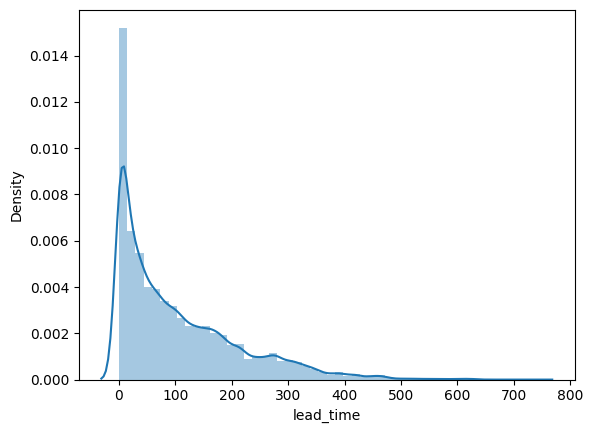

In [ ]:
sns.distplot(df['lead_time'])

In [ ]:
def handle_outliers(col):
    df[col] = np.log1p(df[col])

In [ ]:
handle_outliers('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

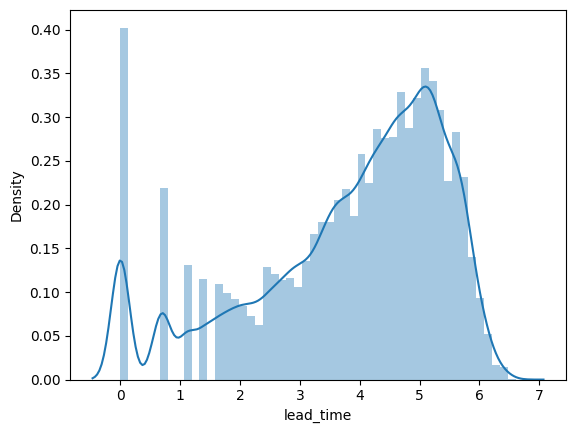

In [ ]:
sns.distplot(df['lead_time'].dropna())

<Axes: xlabel='adr', ylabel='Density'>

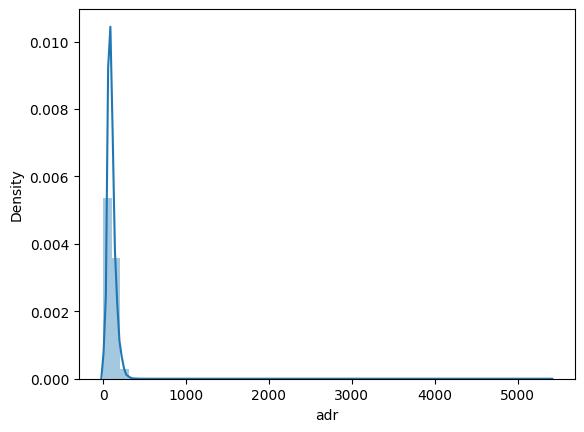

In [ ]:
sns.distplot(df['adr'])

In [ ]:
handle_outliers('adr')

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
y = df['is_canceled']
x = df.drop(['is_canceled'], axis = 1)


In [ ]:
y.head()

,is_canceled
0,0
1,0
2,0
3,0
4,0


In [ ]:
x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,5.837730,2015,July,27,1,0,0,2,0.0,...,No Deposit,0.0,0.0,0,Transient,0.000000,0,0,Check-Out,7/1/2015
1,Resort Hotel,6.603944,2015,July,27,1,0,0,2,0.0,...,No Deposit,0.0,0.0,0,Transient,0.000000,0,0,Check-Out,7/1/2015
2,Resort Hotel,2.079442,2015,July,27,1,0,1,1,0.0,...,No Deposit,0.0,0.0,0,Transient,4.330733,0,0,Check-Out,7/2/2015
3,Resort Hotel,2.639057,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,0.0,0,Transient,4.330733,0,0,Check-Out,7/2/2015
4,Resort Hotel,2.708050,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,0.0,0,Transient,4.595120,0,1,Check-Out,7/3/2015


In [ ]:
x.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [ ]:
import pandas as pd # Import pandas library
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assuming 'x' is your DataFrame with categorical columns
x = pd.get_dummies(x) # Converts categorical columns using one-hot encoding

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True, False, False, ..., False, False, False])

In [ ]:
cols = x.columns
print(cols)

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'reservation_status_date_9/6/2017', 'reservation_status_date_9/7/2015',
       'reservation_status_date_9/7/2016', 'reservation_status_date_9/7/2017',
       'reservation_status_date_9/8/2015', 'reservation_status_date_9/8/2016',
       'reservation_status_date_9/8/2017', 'reservation_status_date_9/9/2015',
       'reservation_status_date_9/9/2016', 'reservation_status_date_9/9/2017'],
      dtype='object', length=1187)


In [ ]:
selected_feature = cols[feature_sel_model.get_support()]
print(selected_feature)

Index(['lead_time', 'company', 'days_in_waiting_list',
       'reservation_status_Check-Out'],
      dtype='object')


In [ ]:
print(f"total features: {x.shape[1]}")
print(f"selected features: {len(selected_feature)}")

total features: 1187
selected features: 4


In [ ]:
x.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'reservation_status_date_9/6/2017', 'reservation_status_date_9/7/2015',
       'reservation_status_date_9/7/2016', 'reservation_status_date_9/7/2017',
       'reservation_status_date_9/8/2015', 'reservation_status_date_9/8/2016',
       'reservation_status_date_9/8/2017', 'reservation_status_date_9/9/2015',
       'reservation_status_date_9/9/2016', 'reservation_status_date_9/9/2017'],
      dtype='object', length=1187)

In [ ]:
x = x[selected_feature]

In [ ]:
x.columns

Index(['lead_time', 'company', 'days_in_waiting_list',
       'reservation_status_Check-Out'],
      dtype='object')

In [ ]:
x.head()

,lead_time,company,days_in_waiting_list,reservation_status_Check-Out
0,5.837730,0.0,0,True
1,6.603944,0.0,0,True
2,2.079442,0.0,0,True
3,2.639057,0.0,0,True
4,2.708050,0.0,0,True


In [ ]:
y.head()

,is_canceled
0,0
1,0
2,0
3,0
4,0


# **splitting data and model building**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 45)

# impliment logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[18725,     0],
       [    0, 11123]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

1.0

# we are implimenting different types of algorithms
# Navie Bayes
#Random Forest
#Decision Tree
#KNN

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

In [ ]:
for name, model in models:
 print(name)
model.fit(x_train, y_train)

prediction = model.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

print('\n')


Naive Bayes
KNN
Random Forest
Decision Tree
1.0


